In [1]:
# Topic Modelling

### Loading Data

In [2]:
import pandas as pd
import nltk

In [3]:
# dataset : news_setopati_preprocessed_1.csv is from मंसिर २९, २०८० to जेठ २०, २०७५ from setopati website in politics section.

In [4]:
df = pd.read_csv("../data/news-setopati/news_setopati_preprocessed_1.csv")
df

,topic,date,title,body,link,source
0,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
1,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
2,politics,"शुक्रबार, मंसिर २९, २०८०","'अदालतले आदेश उल्ट्यायो, आत्मालोचना गर्नुहुन्न?'",सर्वोच्च अदालतका लागि प्रस्तावित न्यायाधीश सार...,https://www.setopati.com/politics/318066,Setopati
3,politics,"शुक्रबार, मंसिर २९, २०८०",संसदीय सुनुवाइ समितिमा सांसदहरूले नै राख्दैनन्...,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...,https://www.setopati.com/politics/318072,Setopati
4,politics,"शुक्रबार, मंसिर २९, २०८०",'समुदायमा कांग्रेस' अभियान पुस १६ गतेदेखि सुरू...,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...,https://www.setopati.com/politics/318070,Setopati
...,...,...,...,...,...,...
38942,politics,"आइतबार, जेठ २०, २०७५",विपी राजमार्गमा मनोमानीः रूट परमिट दिने निर्णय...,काठमाडौंदेखि वर्दिबाससम्मको विपि राजमार्गमा ठू...,https://www.setopati.com/politics/161202,Setopati
38943,politics,"आइतबार, जेठ २०, २०७५",सांसदले अर्थमन्त्रीलाई सोधे : जिडिपी वृद्धि भन...,नेपाली कांग्रेसकी सांसद चित्रलेखा यादवले संसद ...,https://www.setopati.com/politics/161201,Setopati
38944,politics,"आइतबार, जेठ २०, २०७५",छिरिङ वाङ्गेल पुर्पक्षका लागि जेल चलान,साढे किलो सुन र सनम शाक्यको हत्याका मुख्य अभिय...,https://www.setopati.com/politics/161195,Setopati
38945,politics,"आइतबार, जेठ २०, २०७५",अर्थमन्त्रीले प्रत्यक्ष चुनाव लडेमात्र सांसदको...,नेपाली कांग्रेसका सांसद प्रदीप गिरिले अर्थमन्त...,https://www.setopati.com/politics/161191,Setopati


In [5]:
df.head(5)

,topic,date,title,body,link,source
0,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
1,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
2,politics,"शुक्रबार, मंसिर २९, २०८०","'अदालतले आदेश उल्ट्यायो, आत्मालोचना गर्नुहुन्न?'",सर्वोच्च अदालतका लागि प्रस्तावित न्यायाधीश सार...,https://www.setopati.com/politics/318066,Setopati
3,politics,"शुक्रबार, मंसिर २९, २०८०",संसदीय सुनुवाइ समितिमा सांसदहरूले नै राख्दैनन्...,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...,https://www.setopati.com/politics/318072,Setopati
4,politics,"शुक्रबार, मंसिर २९, २०८०",'समुदायमा कांग्रेस' अभियान पुस १६ गतेदेखि सुरू...,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...,https://www.setopati.com/politics/318070,Setopati


In [6]:
df.shape[0]

38947

In [5]:
unprocessed_data = pd.DataFrame(columns=['body'])
unprocessed_data["body"] = df["body"].apply(str)
unprocessed_data

,body
0,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
1,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
2,सर्वोच्च अदालतका लागि प्रस्तावित न्यायाधीश सार...
3,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...
4,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...
...,...
38942,काठमाडौंदेखि वर्दिबाससम्मको विपि राजमार्गमा ठू...
38943,नेपाली कांग्रेसकी सांसद चित्रलेखा यादवले संसद ...
38944,साढे किलो सुन र सनम शाक्यको हत्याका मुख्य अभिय...
38945,नेपाली कांग्रेसका सांसद प्रदीप गिरिले अर्थमन्त...


### Preprocessing

In [6]:
nepali_stopwords = open("../resources/stopwords.txt", "r")
stopwords = nepali_stopwords.read().split()
# print(stopwords)
print(len(stopwords))

501


In [7]:
'''
Remove unwanted characters
Remove stop words 
'''
import re
def string_manipulation(unprocessed_data)  : 
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', x))
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: " ".join([i.replace('\n', '').replace('\t', '').replace("\"",'') for i in x.split() if i not in (stopwords) and i != ' ']))
    return unprocessed_data

processed_data = string_manipulation(unprocessed_data)
processed_data

# processed_data = pd.DataFrame(columns=['body'])
# processed_data["body"] = df["body"]
# processed_data

,body
0,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
1,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
2,सर्वोच्च अदालतका प्रस्तावित न्यायाधीश सारंगा स...
3,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...
4,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...
...,...
38942,काठमाडौंदेखि वर्दिबाससम्मको विपि राजमार्गमा ठू...
38943,नेपाली कांग्रेसकी सांसद चित्रलेखा यादवले संसद ...
38944,साढे किलो सुन सनम शाक्यको हत्याका अभियुक्त भनि...
38945,नेपाली कांग्रेसका सांसद प्रदीप गिरिले अर्थमन्त...


In [8]:
from nepalitokenizer import NepaliTokenizer

In [9]:
'''
tokenizing the corpus 
'''
tokenize = NepaliTokenizer()
processed_data["body"] = processed_data["body"].apply(tokenize.tokenizer)
processed_data

,body
0,"[सर्वोच्च, अदालतमा, प्रस्तावित, न्यायाधीश, अब्..."
1,"[सर्वोच्च, अदालतमा, प्रस्तावित, न्यायाधीश, अब्..."
2,"[सर्वोच्च, अदालतका, प्रस्तावित, न्यायाधीश, सार..."
3,"[सर्वोच्च, अदालतका, प्रधानन्यायाधीश, न्यायाधीश..."
4,"[नेपाली, कांग्रेसले, पुस, गतेदेखि, माघ, गतेसम्..."
...,...
38942,"[काठमाडौंदेखि, वर्दिबाससम्मको, विपि, राजमार्गम..."
38943,"[नेपाली, कांग्रेसकी, सांसद, चित्रलेखा, यादवले,..."
38944,"[साढे, किलो, सुन, सनम, शाक्यको, हत्याका, अभियु..."
38945,"[नेपाली, कांग्रेसका, सांसद, प्रदीप, गिरिले, अर..."


In [10]:
import snowballstemmer
stemmer = snowballstemmer.NepaliStemmer()

In [11]:
'''
Stemming & StopWord removal after Stemming
'''


def get_stem(words):
    global stemmer
    new_list = stemmer.stemWords(words)
    return new_list

def clean_data(words):
    new_list = []
    for word in words:
        if len(word)>2 and word not in stopwords:
            new_list.append(word)

    return new_list
        
# ans = get_stem(["फिल्मी", "अनुराग", "वर्ष", "अघिसम्म", "उनका", "बलिउड"])
# ans

In [12]:
processed_data['body'] = processed_data['body'].apply(lambda x : get_stem(x))

In [13]:
processed_data['body'] = processed_data['body'].apply(lambda x : clean_data(x))

In [14]:
processed_data_list = processed_data['body']

In [15]:
processed_data_list

0        [सर्वोच्च, अदालत, प्रस्तावित, न्यायाधीश, अब्दु...
1        [सर्वोच्च, अदालत, प्रस्तावित, न्यायाधीश, अब्दु...
2        [सर्वोच्च, अदालत, प्रस्तावित, न्यायाधीश, सारंग...
3        [सर्वोच्च, अदालत, प्रधानन्यायाधीश, न्यायाधीश, ...
4        [नेपाली, कांग्रेस, पुस, गते, माघ, गतेसम्म, समु...
                               ...                        
38942    [काठमाडौं, वर्दिबाससम्म, विपि, राजमार्ग, ठूला,...
38943    [नेपाली, कांग्रेस, सांसद, चित्रलेखा, यादव, संस...
38944    [साढे, किलो, सुन, सनम, शाक्य, हत्या, अभियुक्त,...
38945    [नेपाली, कांग्रेस, सांसद, प्रदीप, गिरि, अर्थमन...
38946    [बहुपक्षीय, प्राविधिक, आर्थिक, सहयोग, बंगाल, ख...
Name: body, Length: 38947, dtype: object

### Visualization and Analysis of Data

In [4]:
'''
Finding the frequency Distribution of Words
'''
import pandas as pd
import nltk

processed_data = pd.read_pickle("../results/processed_data.pkl")
processed_data_list = processed_data['body']
words_list = []
for sentence in processed_data_list:
    words_list.extend(sentence)
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)

[('सरकार', 61370),
 ('पार्टी', 55539),
 ('बैठक', 42221),
 ('नेपाल', 41006),
 ('प्रधानमन्त्री', 39584),
 ('प्रदेश', 36497),
 ('नेता', 34187),
 ('कांग्रेस', 30756),
 ('ओली', 28770),
 ('अध्यक्ष', 28768),
 ('समिति', 27301),
 ('निर्णय', 26428),
 ('सदस्य', 26306),
 ('सांसद', 24657),
 ('नेकपा', 24462),
 ('बता', 23767),
 ('नेपाली', 22366),
 ('छलफल', 21497),
 ('निर्वाचन', 21075),
 ('मन्त्री', 20784)]

/home/aashish/dev/projects/topic_modeling/env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/home/aashish/dev/projects/topic_modeling/env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/home/aashish/dev/projects/topic_modeling/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aashish/dev/projects/topic_modeling/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


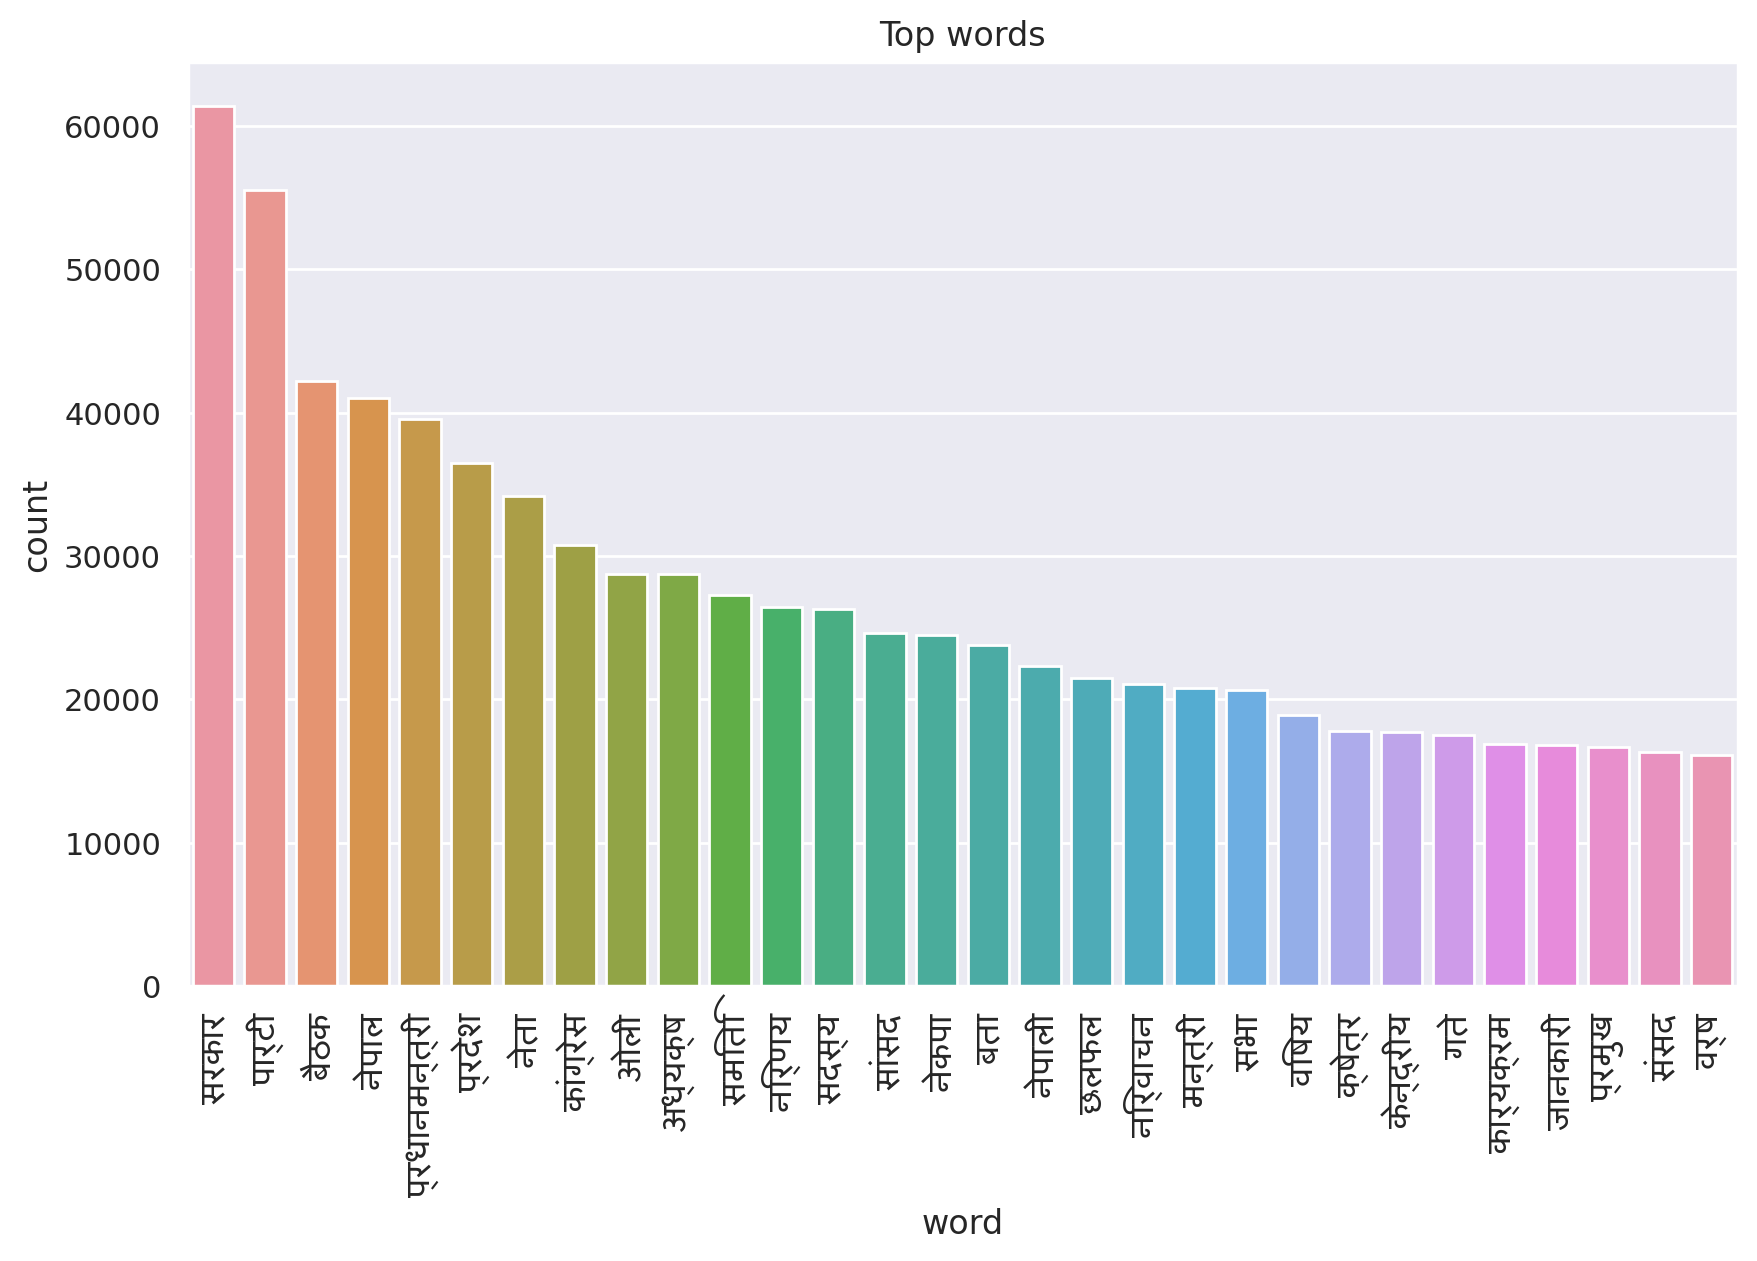

In [6]:
'''
Visualization of Most Frequency 
'''
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set()
nepali_font = FontProperties(fname = '../resources/Mangal.ttf')
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical',fontproperties=nepali_font);

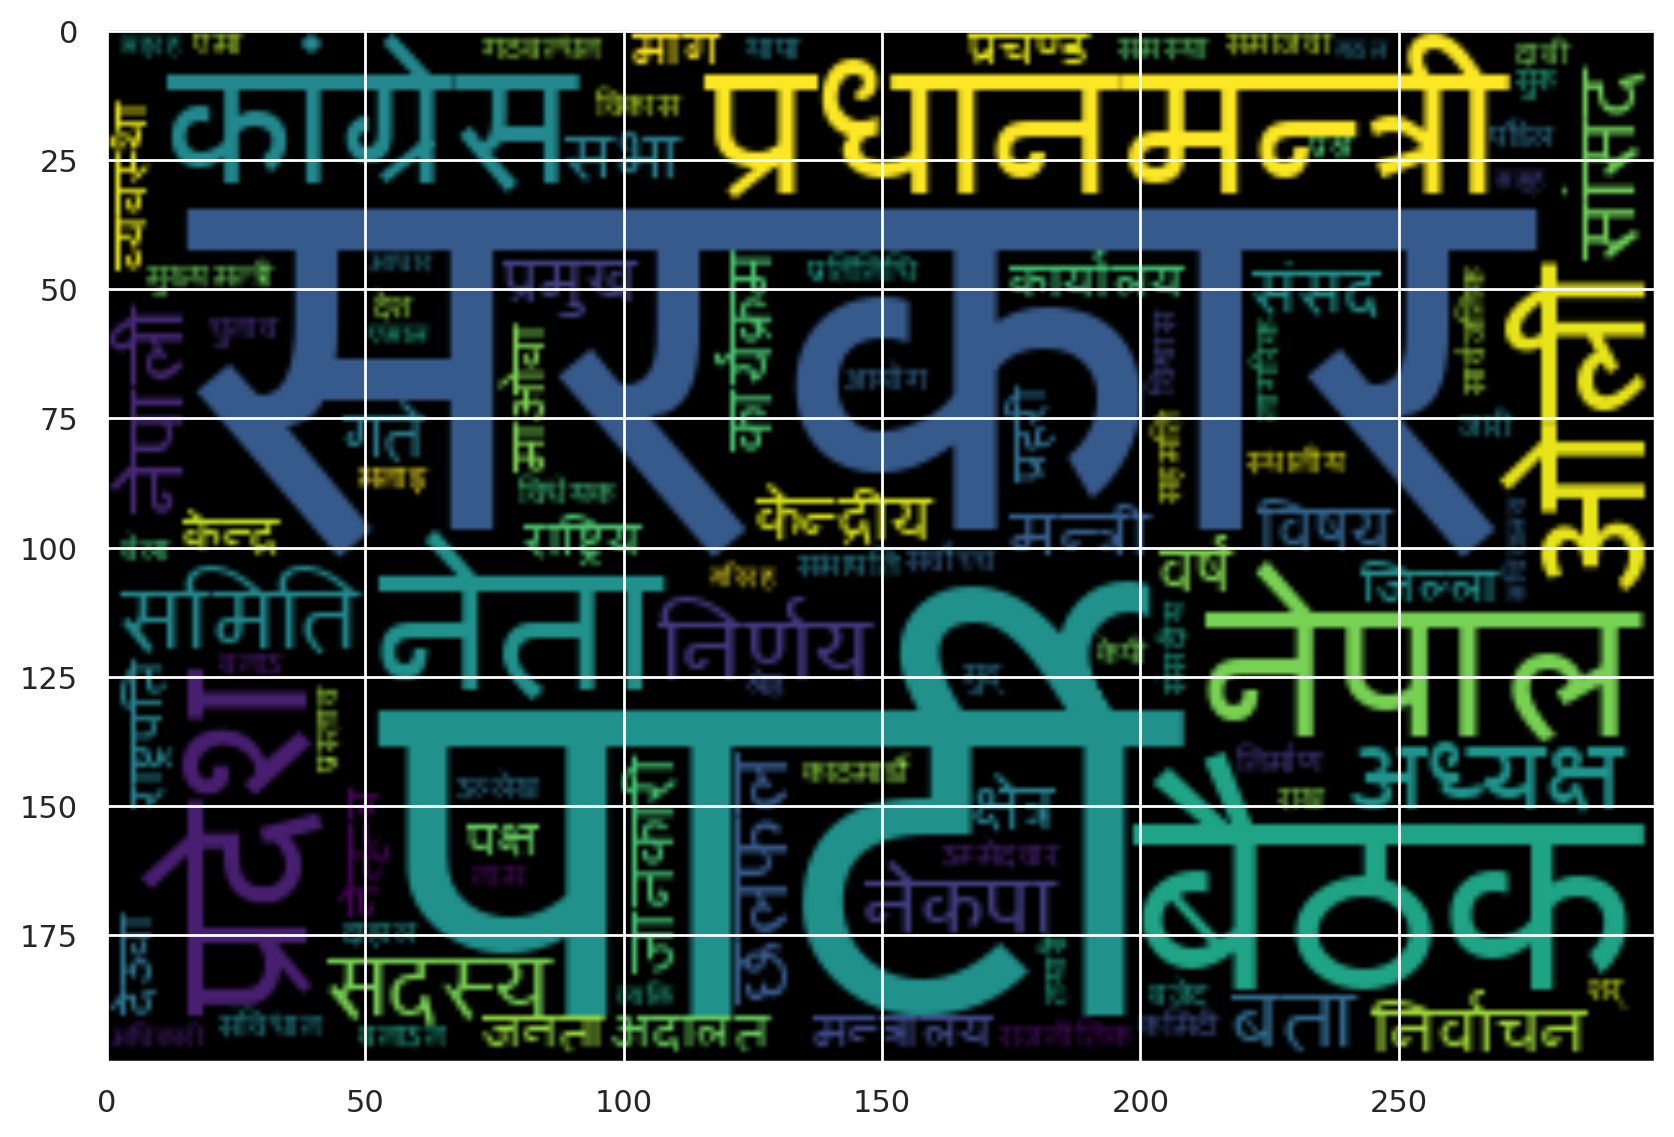

In [9]:
'''
Forming Word Cloud
'''
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud(colormap='viridis', width=300, height=200, font_path="../resources/Mangal.ttf").generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True )

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

### Preparation for LDA

In [19]:
from gensim import corpora

In [20]:
from gensim.test.utils import datapath

In [21]:
'''
Representing the Corpus in dictionary: 
{unique_id : word}
'''
id2word = corpora.Dictionary(processed_data_list)
print(id2word)

Dictionary<220816 unique tokens: ['अजिज', 'अदालत', 'अध्यक्षता', 'अनुमोदन', 'अन्तरिम']...>


In [22]:
'''
Checking dictionary created
'''
# count = 0
# for k, v in id2word.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

'\nChecking dictionary created\n'

In [23]:
'''
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
# id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=None)

In [24]:
print(id2word)

Dictionary<18580 unique tokens: ['अजिज', 'अध्यक्षता', 'अनुमोदन', 'अन्तरिम', 'अब्दुल']...>


In [25]:
# save dictionary
# id2word.save('../saved_model/dictionary_2')

In [26]:
'''
bag-of-words format = list of (token_id, token_count) 2-tuples
'''
#  now lets create a encoded bag of words 
bow_corpus = [id2word.doc2bow(sent) for sent in processed_data_list]
# bow_corpus[0] 

In [ ]:
# # save bow corpus
# with open('../saved_model/bow_corpus_2.txt', 'w') as f:
#     for line in bow_corpus:
#         f.write(f"{line}\n")

In [ ]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 4310 which we have checked in Step 2
# document_num = 4310
# bow_doc_4310 = bow_corpus[document_num]
# count = 0

# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                      id2word[bow_doc_4310[i][0]], 
#                                                      bow_doc_4310[i][1]))
#     count += 1
#     if count > 10:
#         break

### LDA - (BOW)

In [27]:
# Creating the object for LDA model using gensim library
import gensim
from gensim.models import CoherenceModel

In [ ]:
'''
Loading the Saved Model
'''
# loading model from disk
from gensim import  models

# temp_file = datapath("lda_model_politics_31")
lda_model = models.ldamodel.LdaModel.load('../saved_model/lda_model_politics_2')

In [ ]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# LDA = gensim.models.ldamulticore.LdaMulticore
# # [deprecated] lda_model = LDA(corpus=corpus_matrix,id2word=id2word, num_topics=10, random_state=100,update_every=1,chunksize=100,passes=5,alpha='auto',per_word_topics=True)

# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=40, id2word=id2word, passes=50, workers=5)

In [ ]:
'''
For Saving  Model
'''
# saving model to disk.
# [ deprecated ] temp_file = datapath("../../../../../../../saved_model/lda_model_politics_3")
# lda_model.save('../saved_model/lda_model_politics_2')

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic id : {}".format(idx))
    print("Words: {} \n".format(topic))
    print("\n")

In [ ]:
'''
This groups the documents by their topic, for e.g
{
    0 : [list of documents in topic index 0]
}
'''

cluster_by_topic = {}
[cluster_by_topic.setdefault(i, []) for i in range(lda_model.num_topics)]
index = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0.8)
    for topic_id, score in topics_list: 
        cluster_by_topic[topic_id].append(index)
    index += 1

In [ ]:
print(lda_model.num_topics)

In [ ]:
'''
# Printing the documents that belong to a certain topic 
# '''
for k,v in cluster_by_topic.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")


In [ ]:
'''
Getting the top 5 documents in each topics
'''
my_ids = [i for i in range(len(bow_corpus))]

top_documents = {}
[top_documents.setdefault(i, []) for i in range(lda_model.num_topics)]

for topic_id in range(lda_model.num_topics):
    tops = sorted(zip(my_ids, lda_model[bow_corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(topic_id, 0.0)))
    top_five =  tops[ : 5]
    for index, _ in top_five:
        top_documents[topic_id].append(index)

In [ ]:
'''
Printing the top 5 documents in each topics
'''
for k,v in top_documents.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = bow_corpus, dictionary = id2word)
vis

### LDA - (TF-IDF)

In [32]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [33]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
'''
Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)
'''
# count = 0
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)
#     count +=1
#     if count > 10 :
#         break

In [ ]:
# import operator

In [ ]:
'''
This took more than 20 minutes so i had to stop
It attempts to keep training lda model until the thresold is reached
'''
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    # top_topics = [(0, 0)]
    # while top_topics[0][1] < 0.97:

    #     lm = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=id2word, passes=2, workers=2)
    #     coherence_values = {}
    #     for n, topic in lm.show_topics(num_topics=-1, formatted=False):
    #         topic = [word for word, _ in topic]
    #         cm = CoherenceModel(topics=[topic], texts=processed_data_list, dictionary=id2word, window_size=10)
    #         coherence_values[n] = cm.get_coherence()
    #     top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    #     print(top_topics[0][1])
    # return lm, top_topics

In [ ]:
# lm, top_topics = ret_top_model()

### HDP

In [38]:
from gensim.models import HdpModel

In [39]:
hdp_model = gensim.models.HdpModel(bow_corpus, id2word=id2word)

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
# for idx, topic in hdp_model.print_topics(-1):
#     print("Topic: {} \nWords: {}".format(topic, idx ))
#     print("\n")

In [ ]:
# document_dict = {
#     0 : "Manoranjan",
#     1000 : "Sahitya",
#     2000 : "Suchana Prabhidhi",
#     3000 : "Bichar",
#     4350 : "Swasthya",
#     5000 : "Prabas",
#     6000 : "Khelkud",
#     7000 : "Viswa",
#     8000 : "Desh",
#     9000 : "Artha",
# }
# document_num = 9200 
# print()
# # Our test document is document number 4310
# for k,v in document_dict.items():
#     print("\n{}\n".format(v))
#     for index, score in sorted(hdp_model[bow_corpus[k]], key=lambda tup: -1*tup[1]):
#         print("\nScore: {}\t \nTopic: {}".format(score, hdp_model.print_topic(index, 5)))

In [34]:
# '''
# Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
# '''

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=25, id2word = id2word, passes = 50, )

In [ ]:
# '''
# For each topic, we will explore the words occuring in that topic and its relative weight
# '''
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print("Topic: {} Word: {}".format(idx, topic))
#     print("\n")

In [ ]:
# '''
# Check which topic our test document belongs to using the LDA TF-IDF model.
# '''
# # Our test document is document number 4310
# for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [ ]:
# lda_model.print_topics()

### Unseen Document Topic Identification 

In [ ]:
df1 = pd.DataFrame(columns=['body'])
df1

In [ ]:
'''
Unseen Document
'''

# Rajniti
df1.loc[0] = ['''
सन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका नेता इस्माइल हानियाले गाजाका विभिन्न सशस्त्र गुटहरूबीच "बलियो सन्देश र एकताको सङ्केत" को रूपमा 'स्ट्रङ पिलर' छद्म नाम दिइएको चारमध्ये पहिलो सैन्य अभ्यास गर्ने घोषणा गरे।

हमास गाजाको सबैभन्दा शक्तिशाली सशस्त्र समूह थियो। अन्य १० प्यालेस्टिनी समूह पनि सम्मिलित गठबन्धन हमास प्रमुख घटक थियो। ती लडाकु समूहहरू युद्धको खेलजस्तो अभ्यासमा सहभागी भए। त्यसलाई "संयुक्त अपरेशन कक्ष"ले निगरानी गरेको थियो।

गाजाका सशस्त्र गुटहरूसँग एउटा केन्द्रीय कमान्डअन्तर्गत समन्वय गर्न सन् २०१८ मा उक्त संरचना बनाइएको थियो।

सन् २०१८ अघि हमासले प्यालेस्टिनी इस्लामिक जिहाद (पीआईजे) सँग समन्वय गरेको थियो। पीआईजे गाजाको दोस्रो ठूलो सशस्त्र गुट हो। ब्रिटेन र अन्य देशमा उक्त सङ्गठनलाई हमासलाई जसरी नै प्रतिबन्धित आतङ्कवादी सङ्गठनका रूपमा हेरिन्छ। 

पहिलाका द्वन्द्वमा पनि हमासले अरू समूहहरूसँग मिलेर लडाइँ गरेको थियो।

तर २०२० को अभ्यासलाई धेरै समूह एकजुट भएको प्रमाणको रूपमा प्रचारबाजी गरियो।

हमास नेताले पहिलो अभ्यासले सशस्त्र समूहहरूको "स्थायी तत्परता" प्रतिबिम्बित गरेको बताएका थिए।

तीन वर्षमा गरिएका चारवटा संयुक्त अभ्यासमध्ये सन् २०२० को अभ्यास पहिलो थियो। विभिन्न सामाजिक सञ्जालहरूमा ती सबैसँग सम्बन्धित भिडिओहरू छन्।

सन्देश आदानप्रदान गर्ने एप टेलिग्राममा प्रेषित फुटेजका अनुसार ‘स्ट्रङ पिलर’ अभ्यासमा सहभागी भएका पीआईजेसहित १० वटा लडाकु समूहलाई टाउकोमा बाँध्ने पट्टी र चिह्नका आधारमा बीबीसीले स्पष्टसँग पहिचान गरेको छ।  
''' ]

df1

In [ ]:
'''
Preparing the Bag of Words
'''
df1['body'] = df1['body'].apply(str)
processed_new_data = string_manipulation(df1)
df1

In [ ]:
processed_new_data['body'].to_list()[0]

In [ ]:
processed_new_data["body"] = processed_new_data["body"].apply(tokenize.tokenizer)

In [ ]:
processed_new_data

In [ ]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : get_stem(x))
# processed_new_data.news.to_list()

In [ ]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : clean_data(x))
for l in processed_new_data.body.to_list():
    print(len(l))

In [ ]:
list_of_string

In [ ]:
'''
Finds the topic and corresponding score for the unseen document 
'''
# Data preprocessing step for the unseen document
list_of_string = processed_new_data.body.to_list()[0] 
bow_vector = id2word.doc2bow(list_of_string)
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

In [ ]:
# test code
topic_distribution = lda_model[bow_vector]
topic_distribution

In [ ]:
# test code
topics_sorted = sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])

In [ ]:
# test code
topics_sorted = [(i,j) for i,j in topics_sorted if j>0.42]

In [ ]:
# test code
topics_sorted

In [ ]:
# test code
topics_sorted

In [ ]:
# test code
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

topics =['Topic-'+str(idx) for idx,score in topic_distribution if score > 0.02]
score = [score * 100 for idx,score in topic_distribution if score > 0.02 ]
num_bars = len(topic_distribution)
random_colors = [np.random.rand(3,) for _ in range(num_bars)]

ax.bar(topics, score,color=random_colors)

ax.set_ylabel('Topic percentage in Document')
ax.set_title('Constituent percentage of topics in a Document')
ax.legend(title='Percentage')

plt.savefig('topics.png', bbox_inches='tight')

In [ ]:
# test code
x = dict(lda_model.show_topic(0,20))
print(x)

In [ ]:
# test code
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# test code
plt.axis('off')
plt.imshow(WordCloud(font_path="../resources/Mangal.ttf").fit_words(x))
plt.savefig('image.png', bbox_inches='tight')

In [ ]:
# test code
lda_model.print_topic(0)

### Document Similarity - JensenShanon Distance

In [ ]:
import numpy as np

In [ ]:
'''
Obtaining the topic distribution of every document
'''
doc_topic_dist = []
count = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0)
    # print(topics_list)
    # print(len(topics_list))
    # if count > 2:
    #     break
    # count += 1
    row = []
    for idx, score in topics_list:
        row.append(score)

    doc_topic_dist.append(row)

print(len(doc_topic_dist))

In [ ]:
doc_distribution = np.array(doc_topic_dist)
doc_distribution[0]

In [ ]:
df_temp = pd.DataFrame(doc_distribution)

In [ ]:
# save to csv [ check this code if works, as i modified this one ]
# df_temp.to_csv('../saved_model/doc_topic_distribution_39k.csv',index=False,index_label=None)

In [ ]:
# read from csv
df_temp = pd.read_csv('../results/analysis/doc_topic_distribution_39k.csv')

In [ ]:
new_dist = []
for idx,score in lda_model.get_document_topics(bow_vector, minimum_probability=0):
    new_dist.append(score)

new_doc_distribution = np.array(new_dist)
new_doc_distribution.shape
# new_doc_distribution = np.array([tup[1] for tup in lda_model[bow_vector]])
# new_doc_distribution.shape

In [ ]:
from scipy.stats import entropy
from scipy.spatial import distance

In [ ]:
# def jensen_shannon(query, matrix):
#     """
#     This function implements a Jensen-Shannon similarity
#     between the input query (an LDA topic distribution for a document)
#     and the entire corpus of topic distributions.
#     It returns an array of length M where M is the number of documents in the corpus
#     """
#     # lets keep with the p,q notation above
#     p = query[None,:].T # take transpose
#     q = matrix.T # transpose matrix
#     m = 0.5*(p + q)
#     return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    """
    sim = [distance.jensenshannon(data,query) for data in matrix]
    return np.array(sim)

In [ ]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [ ]:
most_sim_ids = get_most_similar_documents(new_doc_distribution, doc_distribution)
print(most_sim_ids)
for ids in most_sim_ids:
    print(df['title'][ids])

In [ ]:
df['title'][12,14]

In [ ]:
import numpy as np

In [ ]:
news_df = pd.read_csv('../../backend/generated_info/top_news_per_topic.csv')

In [ ]:
d = {}
for i in range(40):
    d[i] = np.array(news_df[news_df['topic_no']==i]['topic_no'])

In [ ]:
for i,j in d.items():
    print(i,'--->',len(j))

In [ ]:
 c= news_df[news_df['topic_no']==36]

In [ ]:
c.to_dict(orient='records')

In [ ]:
news_df.iloc[0:10]

In [ ]:
news_df.iloc[1*8:1*8+9]

In [ ]:
x = news_df.iloc[13*8:13*8+8]

In [ ]:
x

In [ ]:
x['score']

## Hyperparameter Tuning

In [28]:
import tqdm
import numpy as np

In [29]:
text = processed_data.body.values.tolist()

In [30]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=50,
                                           )
    
    
    
    return coherence_model_lda.get_coherence()

In [37]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=text, dictionary=id2word, coherence='c_v')
print(coherence_model_lda.get_coherence())

0.5851772476421515


In [41]:

coherence_model_hdp = CoherenceModel(model=hdp_model, texts=text, dictionary=id2word, coherence='c_v')
print(coherence_model_hdp.get_coherence())

0.5584423796438815


In [31]:
cv = compute_coherence_values(corpus=bow_corpus, dictionary=id2word, k=23)
print(cv)

0.6183861178543825


In [29]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 23
max_topics = 25
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, int(num_of_docs*0.75)), 
               bow_corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(len(topics_range))
    
    # iterate through number of topics
    for k in topics_range:
        # get the coherence score for the given parameters
        cv = compute_coherence_values(corpus=bow_corpus, dictionary=id2word, 
                                        k=k)
        # Save the model results
        print(cv)
        
        pbar.update(1)
    pbar.close()

  0%|          | 1/240 [07:18<29:06:35, 438.48s/it]

0.6197678986326711


  1%|          | 2/240 [14:57<29:48:17, 450.83s/it]

0.6024341272613191


  1%|▏         | 3/240 [23:09<30:54:32, 469.51s/it]

0.6087154870920156


KeyboardInterrupt: 

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=text, dictionary=id2word, coherence='c_v')